In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

## RandomPath function
 **'randomPath' only create one path.**
- maxTime = maximum time of one execution.
- minTimePP = minimum random time between two points of the path.
- maxTimePP = maximum random time between two points of the path.
- size = Size of the grid [size,size]
- flightAltitude = Flight altitude.
- posArrayInitial = Initial position index.

In [7]:
def movement(direction):
    #1 - North
    #2 - North-East
    #3 - East
    #.....
    #8 - North-West
    mov_x = 0
    mov_y = 0
    if direction == 1:
        mov_y = -1
    elif direction == 2:
        mov_x = 1
        mov_y = -1
    elif direction == 3:
        mov_x = 1
    elif direction == 4:
        mov_x = 1
        mov_y = 1
    elif direction == 5:
        mov_y = 1
    elif direction == 6:
        mov_x = -1
        mov_y = 1
    elif direction == 7:
        mov_x = -1
    else:
        mov_x = -1
        mov_y = -1
    return mov_x,mov_y   


def canMove(posX,posY,movX,movY,map):
    ans = False
    posX1 = posX + movX
    posY1 = posY + movY
    if map[posX1,posY1] != 0:
        ans = True
    return ans



def randomPath(maxTime,minTimePP,maxTimePP,size,flightAltitude,posArrayInitial):
    time_array = np.array([],dtype=np.int16)
    flagTime = False
    
    while not flagTime:
        num = int(random.uniform(minTimePP,maxTimePP))
        if time_array.sum()+num >= maxTime:
            flagTime = True 
        else:
            time_array = np.append(time_array,num)

    posX,posY = posArrayInitial
    
    #Create the Map/Grid
    baseArray_path = np.ones((size,size))
    baseArray_path = np.pad(baseArray_path,pad_width=1)
    baseArray_path[posY,posX] = 0

    path = [[posX,posY,flightAltitude]]
    cont = 0
    contLimit = 0

    while not np.all(baseArray_path == 0) and cont < time_array.shape[0]-1 and contLimit <=10000:
        #Decide the direction
        dir = random.randint(1,8)
        movX,movY = movement(dir)

        #Can move in that direction?
        flagMove = canMove(posX,posY,movX,movY,baseArray_path)
        contMove = 0

        while contMove < int(size/2) and flagMove:
            #Move
            posX = posX + movX
            posY = posY + movY
            #Upload Map/Grid 
            baseArray_path[posY,posX] = 0

            #Can continue move in that direction?
            flagMove = canMove(posX,posY,movX,movY,baseArray_path)
            contMove += 1
            #print(contMove)

            if not flagMove and contMove < int(size/2):
                path.append([posX,posY,flightAltitude])
                cont += 1
        contLimit+=1

    return baseArray_path,path,time_array


In [12]:
mapa,path,time = randomPath(700,40,80,20,1,[5,5])   

In [13]:
path

[[5, 5, 1],
 [5, 1, 1],
 [3, 3, 1],
 [4, 4, 1],
 [3, 4, 1],
 [1, 2, 1],
 [1, 4, 1],
 [1, 1, 1],
 [1, 4, 1],
 [2, 3, 1],
 [1, 3, 1],
 [2, 3, 1],
 [3, 4, 1]]

In [10]:
time

array([63, 66, 54, 54, 69, 58, 56, 69, 79, 54, 48])

[[ 5  5  1]
 [ 1  9  1]
 [19  1  1]
 [10 10  1]
 [11 10  1]
 [20 10  1]
 [15 15  1]
 [15 20  1]
 [11 16  1]
 [13 16  1]
 [11 16  1]
 [13 16  1]]


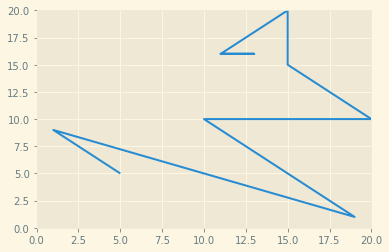

In [19]:
mapa,path,time = randomPath(700,40,80,20,1,[5,5])   
path = np.array(path)
print(path)
plt.style.use('Solarize_Light2')
plt.plot(path[:,0],path[:,1])
plt.xlim([0,20])
plt.ylim([0,20])
plt.show()